# Assignment 2 Brief 

## Deadline: Tuesday, December 3, 2019 at 14:00 hrs

## Number of marks available: 20

## Scope: Sessions 6 to 9

## 1. Instructions
### How and what to submit

A. Submit a Jupyter Notebook named COM4509-6509_Assignment_2_UCard_XXXXXXXXX.ipynb where XXXXXXXXX refers to your UCard number.

B. Upload the notebook file to MOLE before the deadline above.

C. **NO DATA UPLOAD**: Please do not upload the data files used. We have a copy already. 


### Assessment Criteria 

* Being able to manipulate a dataset by generating sythetic data and extracting a particular subset. 

* Being able to build and train different machine learning models with tunable hyperparameters to optimise given evaluation metric.

* Being able to compare different machine learning models and explain interesting results observed. 

* Being able to follow examples in the lab and write code without the help of starter code.


### Late submissions

We follow Department's guidelines about late submissions, i.e., a deduction of 5% of the mark each working day the work is late after the deadline. NO late submission will be marked one week after the deadline because we will release a solution by then. Please read [this link](https://sites.google.com/sheffield.ac.uk/compgtstudenthandbook/menu/assessment/late-submission?pli=1&authuser=1). 

### Use of unfair means 

**"Any form of unfair means is treated as a serious academic offence and action may be taken under the Discipline Regulations."** (from the MSc Handbook). Please carefully read [this link](https://sites.google.com/sheffield.ac.uk/compgtstudenthandbook/menu/referencing-unfair-means?pli=1&authuser=1) on what constitutes Unfair Means if not sure.

# 2. Image classification and denoising

### The CIFAR-10 dataset
In this assignment, we will work on the [**CIFAR-10 dataset**](https://www.cs.toronto.edu/~kriz/cifar.html) collected by Alex Krizhevsky, Vinod Nair, and Geoffrey Hinton from the University of Toronto.  This dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. Each image is a 3-channel colour images of 32x32 pixels in size. There are 50000 training images and 10000 test images. 

			
### Question 1: Data loading and manipulation (4 marks)

1a. **Download** both the training and test data of the CIFAR-10 dataset, e.g., by following the [pytorch CIFAR10 tutorial](https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html). You can also download via other ways if you prefer.

1b. **Add random noise** to all training and test data to generate noisy dataset, e.g., by `torch.randn()`, with a scaling  factor `scale`, e.g., original image `+ scale * torch.randn()`, and **normalise/standardise** the pixel values to the **original range**, e.g.,  using `np.clip()`. You may choose any `scale` value between 0.2 and 0.5. 

**Note: Before generating the random noise, you MUST set the random seed to your UCard number XXXXXXXXX for reproducibility, e.g., using `torch.manual_seed()`. This seed needs to be used for all remaining code if there is randomness, for reproducibility.**

1c. **Extract a subset** with only two classes: **Cat** and **Dog** and name it starting with **CatDog**.        

1d. Show 10 pairs of original and noisy images of cats and 10 pairs of original and noisy images of dogs.

#### Question 1 Answer

In [4]:
# Write the code for your answer here. You can use multiple cells to improve readability.
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
batchSize=1
transform = transforms.Compose(
    [transforms.ToTensor(), # transform the data to tensor
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))]) #nomalise to range[-1,1]

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batchSize,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batchSize,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
          'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

CatDog = ('cat','dog')


Files already downloaded and verified
Files already downloaded and verified


In [5]:
import matplotlib.pyplot as plt
import numpy as np

torch.manual_seed(190249612)
#add noise for original image
def addnoise(img):
    scale=0.5
    img = img + scale * torch.randn(3,32,32)  
    img = np.clip(img,0,1)
    return img

def imshow_ori(img):
    img = img / 2 + 0.5 
    npimg = img.numpy()
    plt.imshow(np.transpose(img, (1, 2, 0))) #rearrange dimensions to numpy format for disply
    plt.show()
    
def imshow_noise(img):
    npimg = img.numpy()
    plt.imshow(np.transpose(img, (1, 2, 0))) #rearrange dimensions to numpy format for disply
    plt.show()

In [6]:
#add nosie for all train data and test data
import copy
ori_trainset=copy.copy(trainset)
ori_testset=copy.copy(testset)

class Addnoise(object):
    def __init__(self):
        pass
        
    def __call__(self, tensor):
        tensor = tensor + 0.3 * torch.randn(tensor.size())
        return np.clip(tensor, 0, 1)

In [7]:
# extract dog and cat
CatDog_images=[]
CatDog_labels=[]
CatDog_noise_images=[]
for data in trainset:
    if data[1]==3 or data[1]==5:
        CatDog_images.append(data[0])
        CatDog_noise_images.append(addnoise(data[0]))
        CatDog_labels.append(data[1])
CatDog_labels=np.array(CatDog_labels)

In [13]:
CatDog_images

array([[[-0.01960784, -0.1372549 , -0.19999999, ...,  0.58431375,
          0.5686275 ,  0.58431375],
        [ 0.11372554,  0.14509809,  0.3803922 , ...,  0.5294118 ,
          0.5529412 ,  0.6       ],
        [ 0.41176474,  0.12156868,  0.22352946, ..., -0.04313725,
          0.09019613,  0.23921573],
        ...,
        [-0.18431371, -0.20784312, -0.20784312, ..., -0.01176471,
         -0.01176471, -0.01960784],
        [-0.18431371, -0.17647058, -0.14509803, ...,  0.082353  ,
          0.07450986,  0.07450986],
        [-0.17647058, -0.15294117, -0.09803921, ...,  0.12156868,
          0.12156868,  0.12941182]],

       [[-0.01960784, -0.20784312, -0.29411763, ...,  0.62352943,
          0.60784316,  0.6313726 ],
        [ 0.14509809,  0.12941182,  0.34901965, ...,  0.5764706 ,
          0.60784316,  0.654902  ],
        [ 0.45098042,  0.14509809,  0.2313726 , ..., -0.12941176,
          0.00392163,  0.15294123],
        ...,
        [-0.35686272, -0.372549  , -0.36470586, ..., -

In [96]:
Test_CatDog_images=[]
Test_CatDog_labels=[]
Test_CatDog_noise_images=[]

for data in testset:
    if data[1]==3 or data[1]==5:
        Test_CatDog_images.append(data[0])
        Test_CatDog_noise_images.append(addnoise(data[0]))
        Test_CatDog_labels.append(data[1])
Test_CatDog_labels=np.array(Test_CatDog_labels) 

Test_CatDog_images_np=np.zeros((2000,3,32,32))
for i in range(len(Test_CatDog_images_np)):
    Test_CatDog_images_np[i]=np.array(Test_CatDog_images[i])    
CatDog_test=Test_CatDog_images_np.reshape(2000,3*32*32)

with noise cat


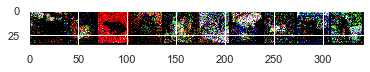

original cat


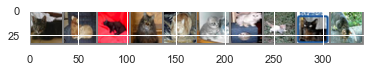

with noise dog


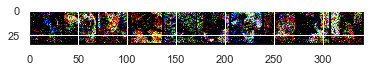

original dog


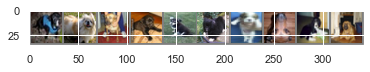

In [97]:

# show number of images of dog and cat
def extract_images(images,labels,num_cat,num_dog):
    count_cat=0
    count_dog=0
    npcat=np.zeros(shape=(num_cat,3,32,32))
    npcat_ori=np.zeros(shape=(num_cat,3,32,32))
    npdog=np.zeros(shape=(num_dog,3,32,32))
    npdog_ori=np.zeros(shape=(num_dog,3,32,32))
    for i in range(len(images)):
        if labels[i] ==3:
            npcat_ori[count_cat]=images[i]
            npcat[count_cat]=addnoise(images[i])
            count_cat+=1
        if count_cat==num_cat:
            break
    for i in range(len(images)):   
        if labels[i]==5:
            npdog_ori[count_dog]=images[i]
            npdog[count_dog]=addnoise(images[i])
            count_dog+=1 
        if count_dog == num_dog:
            break

    cat_tensor=torch.from_numpy(npcat)
    cat_ori_tensor=torch.from_numpy(npcat_ori)
    dog_tensor=torch.from_numpy(npdog)
    dog_ori_tensor=torch.from_numpy(npdog_ori)
    print("with noise",CatDog[0])
    imshow_noise(torchvision.utils.make_grid(cat_tensor,nrow=num_cat))
    print("original",CatDog[0])
    imshow_ori(torchvision.utils.make_grid(cat_ori_tensor,nrow=num_cat))
    print("with noise",CatDog[1])
    imshow_noise(torchvision.utils.make_grid(dog_tensor,nrow=num_dog))
    print("original",CatDog[1])
    imshow_ori(torchvision.utils.make_grid(dog_ori_tensor,nrow=num_dog))
    
    

extract_images(CatDog_images,CatDog_labels,10,10)





### Question 2: Dimensionality reduction, binary classification, and evaluation (6 marks)

This question uses the **CatDog** subset **with no noise added**.

#### Training

2a. Apply PCA on the training set to reduce the dimensionality. You need to study **at least seven** different values ($k_1, k_2, ..., k_7$) for the reduced dimensionality. **Explain** your choice.

2b. Train **eight** Naive Bayes Classifiers (NBC): one on the original features (raw pixels), and seven on PCA features with seven different dimensions in 2a, i.e., NBC on $k_1$ PCA features; NBC on $k_2$ PCA features; ..., NBC on $k_7$ PCA features. You will need to decide on what Naive Bayes classifier (Gaussian? Multinomial? etc.) to use and **explain** your choice.

#### Testing and evaluation
2c. Evalaute the eight Naive Bayes classifiers on the test set in terms of **classification accuracy** and **visualise** their performance using a bar graph.

2d. Plot the [ROC Curves](https://en.wikipedia.org/wiki/Receiver_operating_characteristic) in true positive rates vs false positive rates for the eight Naive Bayes classifiers in **one figure** using eight different line/marker styles clearly labelled. 

2e. Compute the [area under the ROC curve](https://en.wikipedia.org/wiki/Receiver_operating_characteristic#Area_under_the_curve) values for the eight Naive Bayes classifiers and visualise using a bar graph.

2f. Describe **at least three** interesting observations from the evaluation results above. Each observation should have **3-5 sentences**. 


In [98]:
# Write the code for your answer here. You can use multiple cells to improve readability.
from sklearn.decomposition import PCA
def pca(k,data):
    pca = PCA(n_components=k,svd_solver='full',
              whiten=True)
    pca.fit(data)
    pca_data = pca.transform(data)
    return pca_data

CatDog_images_np=np.zeros((10000,3,32,32))
for i in range(len(CatDog_images_np)):
    CatDog_images_np[i]=np.array(CatDog_images[i])
    
CatDog_train=CatDog_images_np.reshape(10000,3*32*32)

K=int(2000*0.95)
k_values=[]
k_value=0
for i in range(7):
    k_values.append(k_value+int(K/7))
    k_value=k_value+int(K/7)

print("seven values of k:",k_values)

k1_pca_train=pca(k_values[0],CatDog_train)
k2_pca_train=pca(k_values[1],CatDog_train)
k3_pca_train=pca(k_values[2],CatDog_train)
k4_pca_train=pca(k_values[3],CatDog_train)
k5_pca_train=pca(k_values[4],CatDog_train)
k6_pca_train=pca(k_values[5],CatDog_train)
k7_pca_train=pca(k_values[6],CatDog_train)



seven values of k: [271, 542, 813, 1084, 1355, 1626, 1897]


In [99]:
k1_pca_test=pca(k_values[0],CatDog_test)
k2_pca_test=pca(k_values[1],CatDog_test)
k3_pca_test=pca(k_values[2],CatDog_test)
k4_pca_test=pca(k_values[3],CatDog_test)
k5_pca_test=pca(k_values[4],CatDog_test)
k6_pca_test=pca(k_values[5],CatDog_test)
k7_pca_test=pca(k_values[6],CatDog_test)

In [100]:
from sklearn.datasets import make_blobs
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score 
def NBC(features, labels):
    model = GaussianNB()
    X = features 
    y = labels
    model.fit(X,y)
    return model

NBC(CatDog_train,CatDog_labels)
NBC(k1_pca_train,CatDog_labels)
NBC(k2_pca_train,CatDog_labels)
NBC(k3_pca_train,CatDog_labels)
NBC(k4_pca_train,CatDog_labels)
NBC(k5_pca_train,CatDog_labels)
NBC(k6_pca_train,CatDog_labels)
NBC(k7_pca_train,CatDog_labels)



GaussianNB(priors=None, var_smoothing=1e-09)

I used Gaussian Naive Bayes, because if each feature is a continuous value, we can use the Gaussian distribution and this version is called Gaussian Naive Bayes.

Text(0.5, 0, 'k dimention')

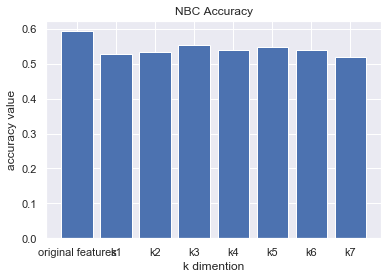

In [101]:
def NB_Accuracy(features_train,labels_train,features_test, labels_test): 
    clf = GaussianNB() 
    X=features_train 
    Y=labels_train 
    clf.fit(X,Y) 
    pred =clf.predict(features_test) 
    y_pred =pred
    y_true =labels_test
    accuracy_score(y_true, y_pred) 
    return accuracy_score(y_true, y_pred,normalize=False)
raw_NBC=NB_Accuracy(CatDog_train,CatDog_labels,CatDog_test,Test_CatDog_labels)
k1_NBC=NB_Accuracy(k1_pca_train,CatDog_labels,k1_pca_test,Test_CatDog_labels)
k2_NBC=NB_Accuracy(k2_pca_train,CatDog_labels,k2_pca_test,Test_CatDog_labels)
k3_NBC=NB_Accuracy(k3_pca_train,CatDog_labels,k3_pca_test,Test_CatDog_labels)
k4_NBC=NB_Accuracy(k4_pca_train,CatDog_labels,k4_pca_test,Test_CatDog_labels)
k5_NBC=NB_Accuracy(k5_pca_train,CatDog_labels,k5_pca_test,Test_CatDog_labels)
k6_NBC=NB_Accuracy(k6_pca_train,CatDog_labels,k6_pca_test,Test_CatDog_labels)
k7_NBC=NB_Accuracy(k7_pca_train,CatDog_labels,k7_pca_test,Test_CatDog_labels)

accuracy_list=[raw_NBC/2000,k1_NBC/2000,k2_NBC/2000,k3_NBC/2000,k4_NBC/2000,k5_NBC/2000,k6_NBC/2000,k7_NBC/2000]
name_list=['original features','k1','k2','k3','k4','k5','k6','k7']
plt.bar(range(len(accuracy_list)),accuracy_list,tick_label=name_list)
plt.title('NBC Accuracy')
plt.ylabel('accuracy value')
plt.xlabel('k dimention')

In [102]:
def get_label(features_train,labels_train,features_test, labels_test): 
    clf = GaussianNB() 
    X=features_train 
    Y=labels_train 
    clf.fit(X,Y) 
    pred =clf.predict_proba(features_test) 
    y_pred =pred
    y_true =labels_test
    return y_pred,y_true

In [103]:
from sklearn.metrics import roc_curve, auc

Text(0.5, 0, 'FPR')

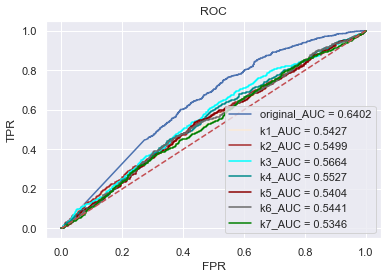

In [104]:
roc_auc_list=[]
y_true=get_label(CatDog_train,CatDog_labels,CatDog_test,Test_CatDog_labels)[1]
y_pred=get_label(CatDog_train,CatDog_labels,CatDog_test,Test_CatDog_labels)[0][:,0]
false_positive_rate,true_positive_rate,thresholds=roc_curve(y_true, y_pred,pos_label=3)
roc_auc=auc(false_positive_rate, true_positive_rate)
roc_auc_list.append(roc_auc)
plt.plot(false_positive_rate, true_positive_rate,'b',label='original_AUC = %0.4f'% roc_auc)

y_true=get_label(k1_pca_train,CatDog_labels,k1_pca_test,Test_CatDog_labels)[1]
y_pred=get_label(k1_pca_train,CatDog_labels,k1_pca_test,Test_CatDog_labels)[0][:,0]
false_positive_rate,true_positive_rate,thresholds=roc_curve(y_true, y_pred,pos_label=3)
roc_auc=auc(false_positive_rate, true_positive_rate)
roc_auc_list.append(roc_auc)
plt.plot(false_positive_rate, true_positive_rate,'#FAEBD7',label='k1_AUC = %0.4f'% roc_auc)

y_true=get_label(k2_pca_train,CatDog_labels,k2_pca_test,Test_CatDog_labels)[1]
y_pred=get_label(k2_pca_train,CatDog_labels,k2_pca_test,Test_CatDog_labels)[0][:,0]
false_positive_rate,true_positive_rate,thresholds=roc_curve(y_true, y_pred,pos_label=3)
roc_auc=auc(false_positive_rate, true_positive_rate)
roc_auc_list.append(roc_auc)
plt.plot(false_positive_rate, true_positive_rate,'#A52A2A',label='k2_AUC = %0.4f'% roc_auc)

y_true=get_label(k3_pca_train,CatDog_labels,k3_pca_test,Test_CatDog_labels)[1]
y_pred=get_label(k3_pca_train,CatDog_labels,k3_pca_test,Test_CatDog_labels)[0][:,0]
false_positive_rate,true_positive_rate,thresholds=roc_curve(y_true, y_pred,pos_label=3)
roc_auc=auc(false_positive_rate, true_positive_rate)
roc_auc_list.append(roc_auc)
plt.plot(false_positive_rate, true_positive_rate,'#00FFFF',label='k3_AUC = %0.4f'% roc_auc)

y_true=get_label(k4_pca_train,CatDog_labels,k4_pca_test,Test_CatDog_labels)[1]
y_pred=get_label(k4_pca_train,CatDog_labels,k4_pca_test,Test_CatDog_labels)[0][:,0]
false_positive_rate,true_positive_rate,thresholds=roc_curve(y_true, y_pred,pos_label=3)
roc_auc=auc(false_positive_rate, true_positive_rate)
roc_auc_list.append(roc_auc)
plt.plot(false_positive_rate, true_positive_rate,'#008B8B',label='k4_AUC = %0.4f'% roc_auc)

y_true=get_label(k5_pca_train,CatDog_labels,k5_pca_test,Test_CatDog_labels)[1]
y_pred=get_label(k5_pca_train,CatDog_labels,k5_pca_test,Test_CatDog_labels)[0][:,0]
false_positive_rate,true_positive_rate,thresholds=roc_curve(y_true, y_pred,pos_label=3)
roc_auc=auc(false_positive_rate, true_positive_rate)
roc_auc_list.append(roc_auc)
plt.plot(false_positive_rate, true_positive_rate,'#8B0000',label='k5_AUC = %0.4f'% roc_auc)

y_true=get_label(k6_pca_train,CatDog_labels,k6_pca_test,Test_CatDog_labels)[1]
y_pred=get_label(k6_pca_train,CatDog_labels,k6_pca_test,Test_CatDog_labels)[0][:,0]
false_positive_rate,true_positive_rate,thresholds=roc_curve(y_true, y_pred,pos_label=3)
roc_auc=auc(false_positive_rate, true_positive_rate)
roc_auc_list.append(roc_auc)
plt.plot(false_positive_rate, true_positive_rate,'#696969',label='k6_AUC = %0.4f'% roc_auc)

y_true=get_label(k7_pca_train,CatDog_labels,k7_pca_test,Test_CatDog_labels)[1]
y_pred=get_label(k7_pca_train,CatDog_labels,k7_pca_test,Test_CatDog_labels)[0][:,0]
false_positive_rate,true_positive_rate,thresholds=roc_curve(y_true, y_pred,pos_label=3)
roc_auc=auc(false_positive_rate, true_positive_rate)
roc_auc_list.append(roc_auc)
plt.plot(false_positive_rate, true_positive_rate,'#008000',label='k7_AUC = %0.4f'% roc_auc)
    
plt.title('ROC')
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.ylabel('TPR')
plt.xlabel('FPR')


Text(0.5, 0, 'k dimention')

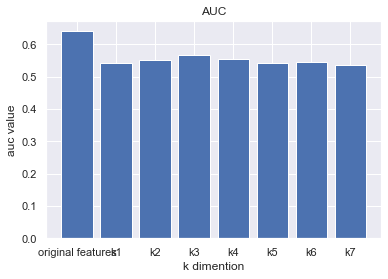

In [105]:
name_list=['original features','k1','k2','k3','k4','k5','k6','k7']
plt.bar(range(len(accuracy_list)),roc_auc_list,tick_label=name_list)
plt.title('AUC')
plt.ylabel('auc value')
plt.xlabel('k dimention')


1. we can see that the classfier that have more features will perform better than the less features one.It means that    more features have more information

2. the original data which is not be dimentionlise has higher AUC value than the reduced dimensionality data. AUC     value also reflects the general performance of the classifiers.

3. In NBC, classification accuracy of original features is always the highest,which is the best classfication.

### Question 3: Noisy data and multiclass classification (6 marks)

#### Noisy **CatDog** subset.

3a. Repeat 2a, 2b, and 2c on the noisy version of CatDog subset. Show the bar graph and compare it with that in 2c above. 

#### Multiclass classification using the original CIFAR-10 dataset (all 10 classes)

3b. Apply PCA on the training set to reduce the dimensionality. You need to study at least **three** different values for the reduced dimensionality. Explain your choice.

3c. Train nine classifers: **four Naive Bayes** classifiers(one on the original features, and three on PCA features with three different dimensions in 3b); **four Logistic Regression** classifiers (one on the original features, and three on PCA features with three different dimensions in 3b); and one **Convoluational Neural Network** as defined in the [pytorch CIFAR10 tutorial](https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html).

3d. Evalaute the nine classifiers on the test set. Summarise the **classification accuracy**, **total training time**, and **total test time** using three bar graphs.

3e. Show the confusion matrix for these nine classifiers (see Lab 8 - 1.4).

3f. Describe **at least three** interesting observations from the evaluation results above. Each observation should have **3-5 sentences**. 

In [106]:
# Write the code for your answer here. You can use multiple cells to improve readability.
CatDog_noise_images_np=np.zeros((10000,3,32,32))
Test_CatDog_noise_images_np=np.zeros((2000,3,32,32))
for i in range(len(CatDog_noise_images_np)):
    CatDog_noise_images_np[i]=np.array(CatDog_noise_images[i])
for i in range(len(Test_CatDog_noise_images_np)):
    Test_CatDog_noise_images_np[i]=np.array(Test_CatDog_noise_images[i])
    
CatDog_noise_train=CatDog_noise_images_np.reshape(10000,3*32*32)
CatDog_noise_test=Test_CatDog_noise_images_np.reshape(2000,3*32*32)

k1_pca_train_noise=pca(k_values[0],CatDog_noise_train)
k2_pca_train_noise=pca(k_values[1],CatDog_noise_train)
k3_pca_train_noise=pca(k_values[2],CatDog_noise_train)
k4_pca_train_noise=pca(k_values[3],CatDog_noise_train)
k5_pca_train_noise=pca(k_values[4],CatDog_noise_train)
k6_pca_train_noise=pca(k_values[5],CatDog_noise_train)
k7_pca_train_noise=pca(k_values[6],CatDog_noise_train)


In [107]:
k1_pca_test_noise=pca(k_values[0],CatDog_noise_test)
k2_pca_test_noise=pca(k_values[1],CatDog_noise_test)
k3_pca_test_noise=pca(k_values[2],CatDog_noise_test)
k4_pca_test_noise=pca(k_values[3],CatDog_noise_test)
k5_pca_test_noise=pca(k_values[4],CatDog_noise_test)
k6_pca_test_noise=pca(k_values[5],CatDog_noise_test)
k7_pca_test_noise=pca(k_values[6],CatDog_noise_test)


Text(0.5, 0, 'k dimention')

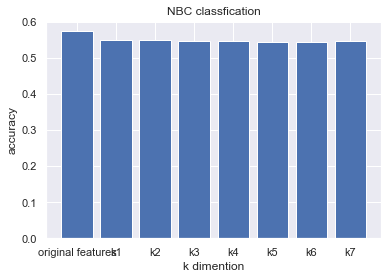

In [108]:
noise_raw_NBC=NB_Accuracy(CatDog_noise_train,CatDog_labels,CatDog_noise_test,Test_CatDog_labels)
noise_k1_NBC=NB_Accuracy(k1_pca_train_noise,CatDog_labels,k1_pca_test_noise,Test_CatDog_labels)
noise_k2_NBC=NB_Accuracy(k2_pca_train_noise,CatDog_labels,k2_pca_test_noise,Test_CatDog_labels)
noise_k3_NBC=NB_Accuracy(k3_pca_train_noise,CatDog_labels,k3_pca_test_noise,Test_CatDog_labels)
noise_k4_NBC=NB_Accuracy(k4_pca_train_noise,CatDog_labels,k4_pca_test_noise,Test_CatDog_labels)
noise_k5_NBC=NB_Accuracy(k5_pca_train_noise,CatDog_labels,k5_pca_test_noise,Test_CatDog_labels)
noise_k6_NBC=NB_Accuracy(k6_pca_train_noise,CatDog_labels,k6_pca_test_noise,Test_CatDog_labels)
noise_k7_NBC=NB_Accuracy(k7_pca_train_noise,CatDog_labels,k7_pca_test_noise,Test_CatDog_labels)

accuracy_list=[noise_raw_NBC/2000,noise_k1_NBC/2000,noise_k2_NBC/2000,noise_k3_NBC/2000,noise_k4_NBC/2000,noise_k5_NBC/2000,noise_k6_NBC/2000,noise_k7_NBC/2000]
name_list=['original features','k1','k2','k3','k4','k5','k6','k7']
plt.bar(range(len(accuracy_list)),accuracy_list,tick_label=name_list)
plt.title('NBC classfication')
plt.ylabel('accuracy')
plt.xlabel('k dimention')



In [109]:
K=int(2000*0.95)
k_values=[]
k_value=0
for i in range(3):
    k_values.append(k_value+int(K/3))
    k_value=k_value+int(K/3)

print("three values of k:",k_values)



three values of k: [633, 1266, 1899]


Explain why I choose the values of k:
when I consider the total values of k, I set a cumulative contribution rate which is 95%. Then we have three principal components so make them reach 95% contribution. So get the mean of 95% original dimension, adding the mean from zero and execute 3 times to get 3 different k.

In [126]:
import time
accuracy_list=[]
train_time=[]

In [127]:
k1_pca_train_noise=pca(k_values[0],CatDog_noise_train)
k2_pca_train_noise=pca(k_values[1],CatDog_noise_train)
k3_pca_train_noise=pca(k_values[2],CatDog_noise_train)

k1_pca_test_noise=pca(k_values[0],CatDog_noise_test)
k2_pca_test_noise=pca(k_values[1],CatDog_noise_test)
k3_pca_test_noise=pca(k_values[2],CatDog_noise_test)


In [128]:
time_start = time.time()
NBC(CatDog_noise_train,CatDog_labels)
NBC(k1_pca_train_noise,CatDog_labels)
NBC(k2_pca_train_noise,CatDog_labels)
NBC(k3_pca_train_noise,CatDog_labels)
time_finish = time.time()
train_time.append(time_finish-time_start)


In [129]:
test_time=[]
time_start = time.time()
noise_raw_NBC=NB_Accuracy(CatDog_noise_train,CatDog_labels,CatDog_noise_test,Test_CatDog_labels)
accuracy_list.append(noise_raw_NBC/2000)
noise_k1_NBC=NB_Accuracy(k1_pca_train_noise,CatDog_labels,k1_pca_test_noise,Test_CatDog_labels)
accuracy_list.append(noise_k1_NBC/2000)
noise_k2_NBC=NB_Accuracy(k2_pca_train_noise,CatDog_labels,k2_pca_test_noise,Test_CatDog_labels)
accuracy_list.append(noise_k2_NBC/2000)
noise_k3_NBC=NB_Accuracy(k3_pca_train_noise,CatDog_labels,k3_pca_test_noise,Test_CatDog_labels)
accuracy_list.append(noise_k3_NBC/2000)
time_finish = time.time()
test_time.append(time_finish-time_start)


In [130]:
preds = np.zeros((9, 10000))
clf = GaussianNB()
clf.fit(CatDog_noise_train, CatDog_labels)
preds[0] = clf.predict(CatDog_noise_train)
clf.fit(k1_pca_train_noise, CatDog_labels)
preds[1] = clf.predict(k1_pca_train_noise)
clf.fit(k2_pca_train_noise, CatDog_labels)
preds[2] = clf.predict(k2_pca_train_noise)
clf.fit(k3_pca_train_noise, CatDog_labels)
preds[3] = clf.predict(k3_pca_train_noise)

#preds[0]=get_label(CatDog_noise_train,CatDog_labels,CatDog_noise_test,Test_CatDog_labels)[0][:,0]
#preds[1]=get_label(k1_pca_train_noise,CatDog_labels,k1_pca_test_noise,Test_CatDog_labels)[0][:,0]
#preds[2]=get_label(k2_pca_train_noise,CatDog_labels,k2_pca_test_noise,Test_CatDog_labels)[0][:,0]
#preds[3]=get_label(k3_pca_train_noise,CatDog_labels,k3_pca_test_noise,Test_CatDog_labels)[0][:,0]


In [131]:
from sklearn.linear_model import LogisticRegression

time_start = time.time()
classifier_ori = LogisticRegression()
classifier_ori.fit(CatDog_noise_train,CatDog_labels)
accuracy_list.append(classifier_ori.score(CatDog_noise_test, Test_CatDog_labels))



classifier_k1 = LogisticRegression()
classifier_k1.fit(k1_pca_train_noise,CatDog_labels)
accuracy_list.append(classifier_k1.score(k1_pca_test_noise, Test_CatDog_labels))



classifier_k2 = LogisticRegression()
classifier_k2.fit(k2_pca_train_noise,CatDog_labels)
accuracy_list.append(classifier_k2.score(k2_pca_test_noise, Test_CatDog_labels))



classifier_k3 = LogisticRegression()
classifier_k3.fit(k3_pca_train_noise,CatDog_labels)
accuracy_list.append(classifier_k3.score(k3_pca_test_noise, Test_CatDog_labels))


time_finish = time.time()
train_time.append(time_finish-time_start)


/Users/yangwuan/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/yangwuan/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/yangwuan/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/yangwuan/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [132]:
time_start = time.time()
preds[4] = classifier_ori.predict(CatDog_noise_train)
preds[5] = classifier_k1.predict(k1_pca_train_noise)
preds[6] = classifier_k2.predict(k2_pca_train_noise)
preds[7] = classifier_k3.predict(k3_pca_train_noise)
time_finish = time.time()
test_time.append(time_finish-time_start)


In [133]:
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [134]:
trainloader1 = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)
testloader1 = torch.utils.data.DataLoader(testset, batch_size=10000,
                                         shuffle=False, num_workers=2)
time_start = time.time()
for epoch in range(3):  # loop over the dataset multiple times
    running_loss = 0.0
    for i, data in enumerate(trainloader1, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0
time_finish = time.time()
train_time.append(time_finish-time_start)

[1,  2000] loss: 2.230
[1,  4000] loss: 1.928
[1,  6000] loss: 1.698
[1,  8000] loss: 1.590
[1, 10000] loss: 1.526
[1, 12000] loss: 1.479
[2,  2000] loss: 1.432
[2,  4000] loss: 1.377
[2,  6000] loss: 1.366
[2,  8000] loss: 1.314
[2, 10000] loss: 1.312
[2, 12000] loss: 1.304
[3,  2000] loss: 1.217
[3,  4000] loss: 1.223
[3,  6000] loss: 1.197
[3,  8000] loss: 1.210
[3, 10000] loss: 1.225
[3, 12000] loss: 1.168


In [135]:
PATH = './cifar_net.pth'
torch.save(net.state_dict(), PATH)
net = Net()
net.load_state_dict(torch.load(PATH))

correct = 0
total = 0
time_start= time.time()
with torch.no_grad():
    for i, data in enumerate(testloader1):
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        preds[8] = predicted.numpy()
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

time_finish = time.time()
test_time.append(time_finish-time_start)
accuracy_list.append(correct / total)


Text(0, 0.5, 'accuracy')

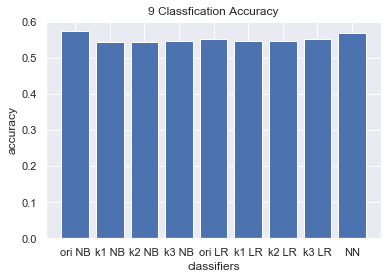

In [136]:
accuracy_list
name_list=['ori NB','k1 NB','k2 NB','k3 NB','ori LR','k1 LR','k2 LR','k3 LR','NN']
plt.bar(range(len(accuracy_list)),accuracy_list,tick_label=name_list)
plt.title("9 Classfication Accuracy")
plt.xlabel("classifiers")
plt.ylabel("accuracy")

Text(0, 0.5, 'train_time')

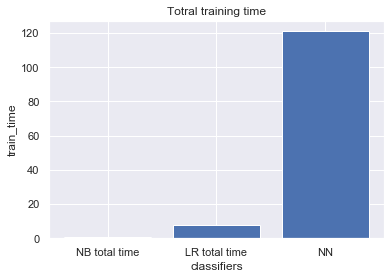

In [138]:
train_time
time_list=['NB total time','LR total time','NN']
plt.bar(range(len(train_time)),train_time,tick_label=time_list)
plt.title("Totral training time")
plt.xlabel("classifiers")
plt.ylabel("train_time")

Text(0, 0.5, 'test_time')

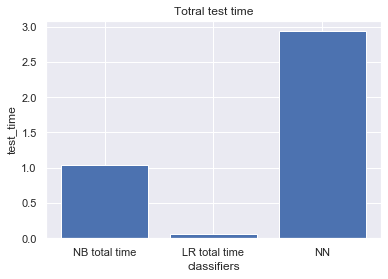

In [139]:
test_time
time_list=['NB total time','LR total time','NN']
plt.bar(range(len(test_time)),test_time,tick_label=time_list)
plt.title("Totral test time")
plt.xlabel("classifiers")
plt.ylabel("test_time")

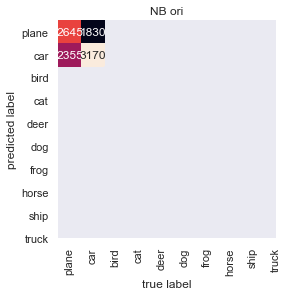

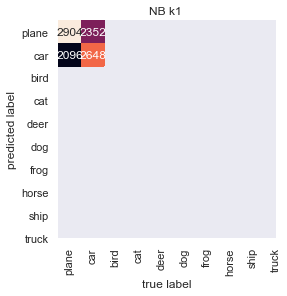

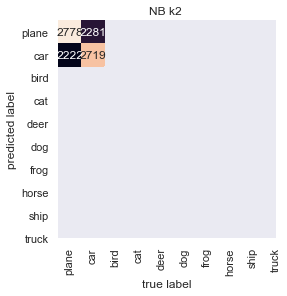

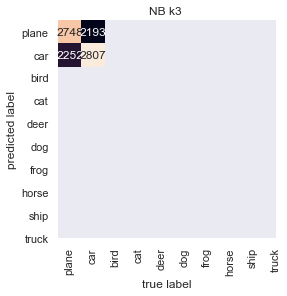

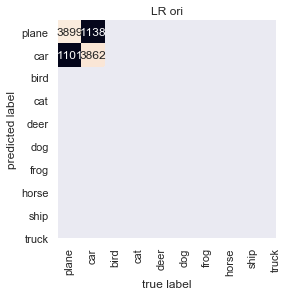

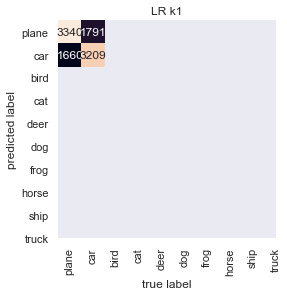

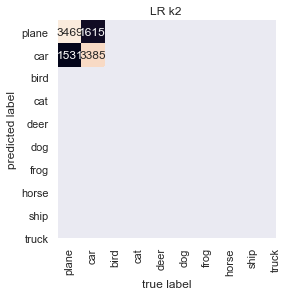

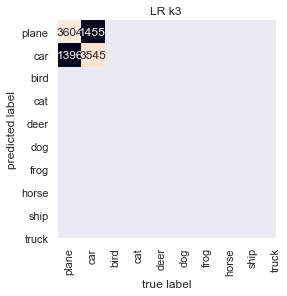

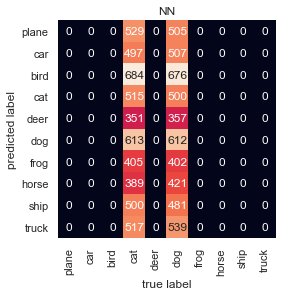

In [140]:
from sklearn.metrics import confusion_matrix
import seaborn as sns; sns.set()

classifiers = ["NB ori", "NB k1 ", "NB k2 ", "NB k3 ", "LR ori", "LR k1", "LR k2 ", "LR k3 ","NN"]

for i in range(9):
    mat = confusion_matrix(CatDog_labels, preds[i])
    sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
                xticklabels=classes, yticklabels=classes)
    plt.title(classifiers[i])
    plt.xlabel('true label')
    plt.ylabel('predicted label')
    plt.show()

1. convolutional neural network performs best and Logistic regression ranks second.
2. CNN training takes much more time than LR and NBC classfication
3. the accuracy of LR is lower than NBC and CNN, which is only around 0.3-0.4, but NBC and CNN are similar with nearly 0.6

### Question 4: Denoising Autoencoder (4 marks)

This question uses both the original and noisy CIFAR-10 datasets (all 10 classes).

Read about denoising autoencoder at [Wikepedia](https://en.wikipedia.org/wiki/Autoencoder#Denoising_autoencoder_(DAE)) and this [short introduction](https://towardsdatascience.com/denoising-autoencoders-explained-dbb82467fc2) or any other sources you like.

4a. Modify the autoencoder architecture in Lab 7 so that it takes colour images as input (i.e., 3 input channels). 

4b. **Training**: feed the **noisy training images** as input to the autoencoder in 4a; use a loss function that computes the reconstruction error between the **output of the autoencoder** and the respective **original images**.

4c. **Testing**: evaluate the autoencoder trained in 4b on the test datasets (feed noisy images in and compute reconstruction errors on original clean images. Find the **worstly denoised** 30 images (those with the largest reconstruction errors) in the test set and show them in pairs with the original images (60 images to show in total).

4d. Choose at least two hyperparameters to vary. Study **at least three different choices** for each hyperparameter. When varying one hyperparameter, all the other hyperparameters can be fixed. Visualise the performance sensitivity with respect to these hyperparameters.

4e. Describe **at least two** interesting observations from the evaluation results above. Each observation should have **3-5 sentences**. 

In [141]:
# Write the code for your answer here. You can use multiple cells to improve readability.
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            # 3 input image channel, 16 output channel, 3x3 square convolution
            nn.Conv2d(3, 16, 3, stride=2, padding=1),
            nn.ReLU(),
            nn.Conv2d(16, 32, 3, stride=2, padding=1),
            nn.ReLU(),
            nn.Conv2d(32, 64, 7)
        )
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(64, 32, 7),
            nn.ReLU(),
            nn.ConvTranspose2d(32, 16, 3, stride=2, padding=1, output_padding=1),
            nn.ReLU(),
            nn.ConvTranspose2d(16, 3, 3, stride=2, padding=1, output_padding=1),
            nn.Sigmoid()  #to range [0, 1]
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

In [142]:
from torch.utils.data import Dataset
from PIL import Image

class original_noise(Dataset):
    def __init__(self, data, targets, transform1=None, transform2=None, target_transform=None):
     
        self.data = np.array(data)
        self.targets = np.array(targets)
        self.transform1 = transform1
        self.transform2 = transform2

    def __len__(self):
        return len(self.data)

    def __getitem__(self, index):
        img, target = self.data[index], self.targets[index]

        # doing this so that it is consistent with all other datasets
        # to return a PIL Image
        img = Image.fromarray(img)

        if self.transform1 is not None:
            ori_img = self.transform1(img)
        if self.transform2 is not None:
            noise_img = self.transform2(img)

        return ori_img, noise_img, target

In [143]:
noise_transform = transforms.Compose(
    [transforms.ToTensor(),
     Addnoise(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])   

ori_noise_trainset = original_noise(trainset.data, trainset.targets, transform, noise_transform)

ori_noise_testset = original_noise(testset.data, testset.targets, transform, noise_transform)
testloader1 = torch.utils.data.DataLoader(ori_noise_testset, batch_size=1,shuffle=False)


batch_size=64
learning_rate=1e-3
max_epochs = 3

trainloader1 = torch.utils.data.DataLoader(ori_noise_trainset, batch_size=batch_size,
                                          shuffle=True)

myAE=Autoencoder()
#Set the random seed for reproducibility 
torch.manual_seed(1720702) 
#Choose mean square error loss
criterion = nn.MSELoss()
#Choose the Adam optimiser
optimizer = torch.optim.Adam(myAE.parameters(), lr=learning_rate, weight_decay=1e-5)
#Start training
for epoch in range(max_epochs):
    for data in trainloader1:
        ori_img, noise_img, label = data
        optimizer.zero_grad()
        recon = myAE(noise_img)
        loss = criterion(recon, ori_img)
        loss.backward()
        optimizer.step()            
    print('Epoch:{}, Loss:{:.4f}'.format(epoch+1, float(loss)))


Epoch:1, Loss:0.2020
Epoch:2, Loss:0.1449
Epoch:3, Loss:0.1508


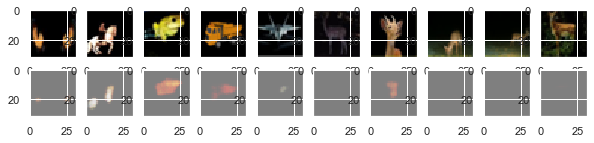

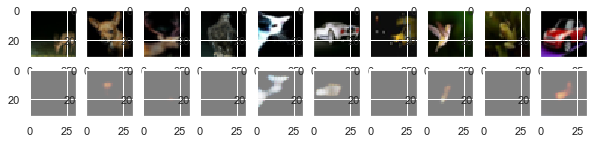

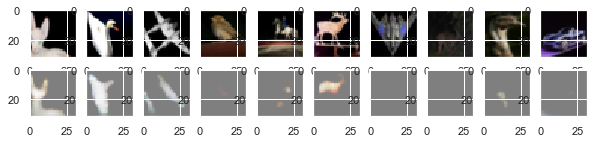

In [144]:
PATH = './autoencoder.pth'
torch.save(myAE.state_dict(), PATH)
PATH = './autoencoder.pth'
myAE = Autoencoder()
myAE.load_state_dict(torch.load(PATH))

outputs = []
with torch.no_grad():
    for data in testloader1:
        ori_img, noise_img, label = data
        recon = myAE(noise_img)
        error = criterion(recon, ori_img)
        outputs.append((ori_img, recon, float(error)))
outputs.sort(key = lambda k:k[2], reverse=True)

def recover_img(img):
    img = img[0] / 2 + 0.5
    img = np.transpose(img, (1, 2, 0))
    return img

for j in range(3):
    plt.figure(figsize=(10, 2))
    for i in range(10):
        img = outputs[10*j+i][0].numpy()    
        recon = outputs[10*j+i][1].numpy()
        plt.subplot(2, 10, i+1)
        plt.imshow(recover_img(img))
        plt.subplot(2, 10, i+10+1)
        plt.imshow(recover_img(recon))